## Tarea 13

__ Ejercicio 1:__ Resolver oscilador amortiguado:
$$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$.
Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.

Primero importaré las librerias y definiré los métodos que vamos a usar. 
Modifiqué un poco los métodos para que se pudiera extraer más facil la informacion de cada variable guardandolas por separado. 

In [1]:
using Plots
using LaTeXStrings


In [263]:
function MetodoEuler(f,xo,to,t,h)#Aqui preferí hacer el método con los 5 parametros para que el usuario pueda elegir t0 y tf directamente cada que usa el método.
    x=xo
    listt=to:h:t
    listx=[xo[1]]
    listv=[xo[2]]
    for i in 1:length(listt)-1  
    x=x+h*f(x,listt[i])   
        push!(listx,x[1])
        push!(listv,x[2])
    end
    return listt,listx,listv
end

MetodoEuler (generic function with 1 method)

In [378]:
function RungeKutta4th(f,xo,to,t,h)#Aqui preferí hacer el método con los 5 parametros para que el usuario pueda elegir t0 y tf directamente cada que usa el método.
    x=xo
    listt=to:h:t
    listx=[xo[1]]
    listv=[xo[2]]
    for i in 1:length(listt)-1
        
    k1=f(x,listt[i])
    k2=f(x+(h/2)*k1,listt[i]+h/2) 
    k3=f(x+(h/2)*k2,listt[i]+h/2) 
    k4=f(x+h*k3,listt[i]+h)
        
    x=x+(h/6)*(k1+2k2+2k3+k4)
        
        push!(listx,x[1])
        push!(listv,x[2])
    end
    return listt,listx,listv
end

RungeKutta4th (generic function with 1 method)

In [156]:
f(x,t)=[x[2],-x[1]-x[2]]
exacta(t)=sin(t)
ci=[1.0,0.0]

2-element Array{Float64,1}:
 1.0
 0.0

__ Método de Runge Kutta __

In [22]:
τ=RungeKutta4th(f,ci,0.0,8*pi,0.01)[1]  #parametro t
xk=RungeKutta4th(f,ci,0.0,8*pi,0.01)[2]  # x
yk=RungeKutta4th(f,ci,0.0,8*pi,0.01)[3];  # dx/dt


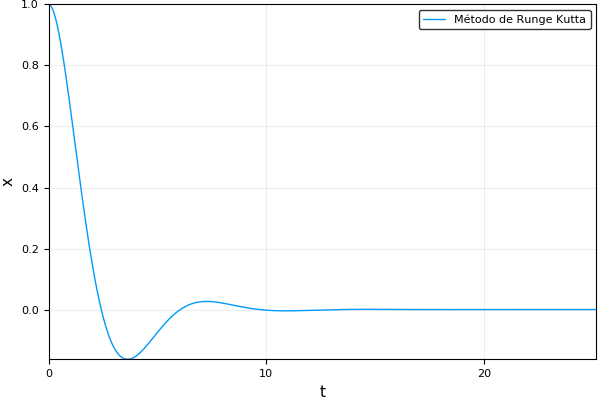

In [23]:
plot(τ,xk,xlabel="t",ylabel="x",label="Método de Runge Kutta")


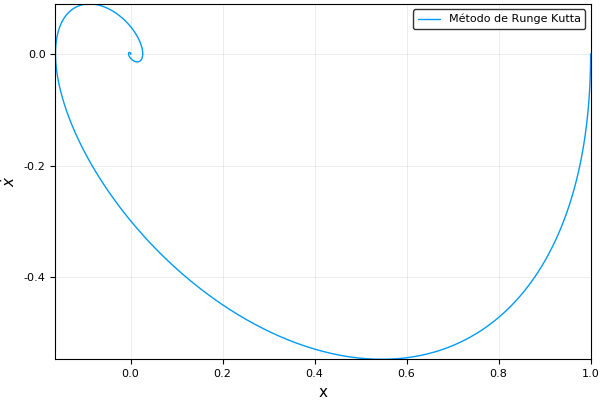

In [24]:
plot(xk,yk,xlabel="x",ylabel=L"\dot x",label="Método de Runge Kutta")


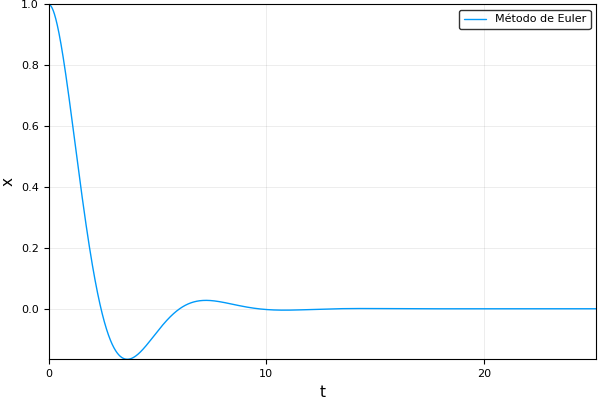

In [25]:
τ=MetodoEuler(f,ci,0.0,8*pi,0.01)[1]  #parametro t
xE=MetodoEuler(f,ci,0.0,8*pi,0.01)[2]  # x
yE=MetodoEuler(f,ci,0.0,8*pi,0.01)[3];  # dx/dt
plot(τ,xE,xlabel="t",ylabel="x",label="Método de Euler")


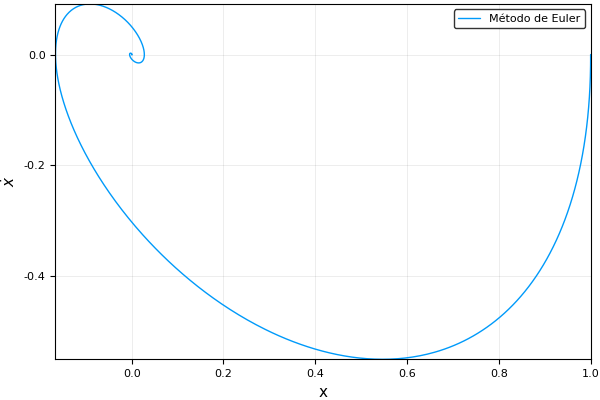

In [26]:
plot(xE,yE,xlabel="x",ylabel=L"\dot x",label="Método de Euler")


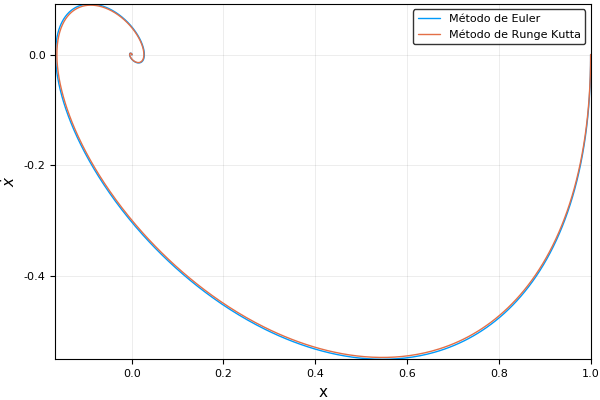

In [27]:
plot(xE,yE,xlabel="x",ylabel=L"\dot x",label="Método de Euler")
plot!(xk,yk,xlabel="x",ylabel=L"\dot x",label="Método de Runge Kutta")

__ Ejercicio 2:__Resolver el péndulo simple:
$$l \ddot\theta=-g \sin(\theta),$$
usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

In [501]:
f(x,t)=[x[2],-sin(x[1])]


f (generic function with 1 method)

In [626]:
T=[]
X=[]
Y=[]
for i in 1:70  
ci=rand(2,1)*(9) -4.5
τ=RungeKutta4th(f,ci,-20,20,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-20,20,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-20,20,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end


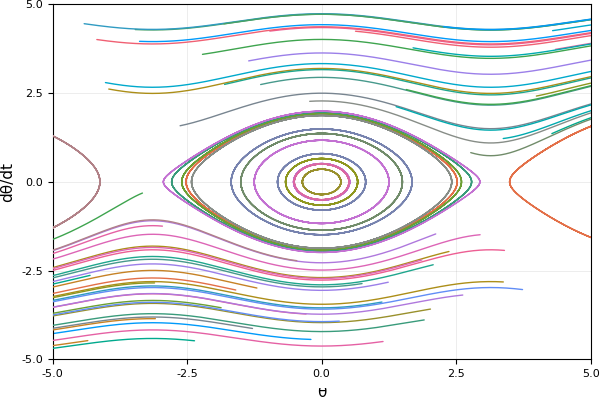

In [627]:
plot(X,Y,label="",xlabel="θ",ylabel="dθ/dt",xlims=(-5,5),lims=(-5,5))

Podemos ver que en el origen hay centradas orbitas estables es decir orbitas cerradas del péndulo mientras que cuando nos alejamos del origen encontramos las orbitas inestables del péndulo, estas orbitas no se cierran e incluso hacen al péndulo subir más allá de la horizontal dando vueltas, es decir, sin retornar. 

__ ejercicio 3: __ Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema:
$$\frac{dx}{dt}=x^2-1,$$
hay dos _puntos fijos_, ubicados en $1$ y $-1$, compruebe además que el $1$ es un _repulsor_ y el $-1$ un _atractor_. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [374]:
f(x,t)=[x[1]^2-1,0]

f (generic function with 1 method)

In [494]:
T=[]
X=[]
Y=[]
for i in 1:20  
S=-2*rand(1)+1   
ci=[S[1],0]
τ=RungeKutta4th(f,ci,-3.0,3.0,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-3.0,3.0,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-3.0,3.0,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
     
end


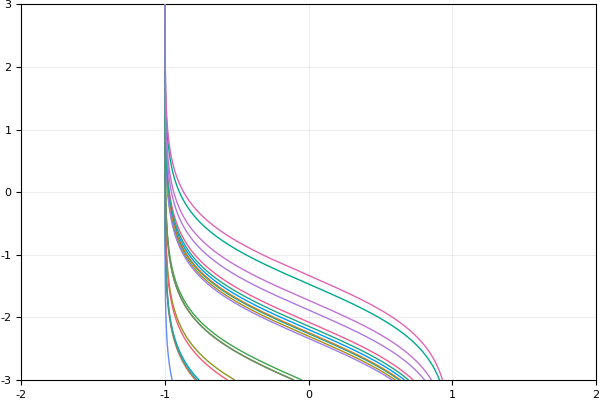

In [496]:
plot(X,T,xlims=(-2,2),label="")

Podemos notar claramente que -1 es un atractor mientras que 1 es un repulsor del sistema. 

__ Ejercicio 4:__También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

In [628]:
f(x,t)=[x[1]^2,0]

f (generic function with 1 method)

In [669]:
T=[]
X=[]
Y=[]
for i in 1:100  
S=rand(1)*30-15
ci=[S[1],0]
τ=RungeKutta4th(f,ci,-10.0,10.0,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-10.0,10.0,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-10.0,10.0,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
     
end


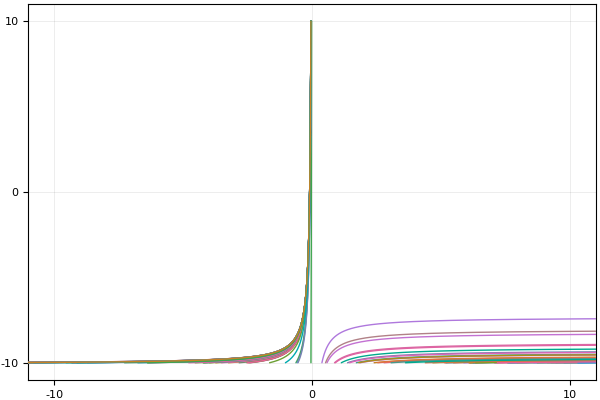

In [670]:
plot(X,T,xlims=(-11,11),ylims=(-11,11),label="")

El único punto fijo es el 0 y parece comportarse como un repulsor.

__ Ejercicio 5: __Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones:
$$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$
donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$
Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:
* $a=b=1$, $c=d=0$
* $a=b=-1$, $c=d=0$
* $a=1$, $b=-2$, $c=d=0$
* $a=1$, $b=-0.5$, $c=d=0$
* $a=d=0$, $b=-c=1$
* $a=d=1$, $b=-c=1$
* $a=d=-1$, $b=-c=1$
* $a=d=-1$, $b=-c=-1$
* $a=b=1$, $b=4,c=-2$
* $a=b=d=-1$, $c=0$

__ 1)__

In [710]:
f(x,t)=[x[1]+x[2],0]

f (generic function with 1 method)

In [711]:
T=[]
X=[]
Y=[]
for i in 1:100  
ci=rand(2,1)*(10) -5
τ=RungeKutta4th(f,ci,-20,20,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-20,20,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-20,20,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end


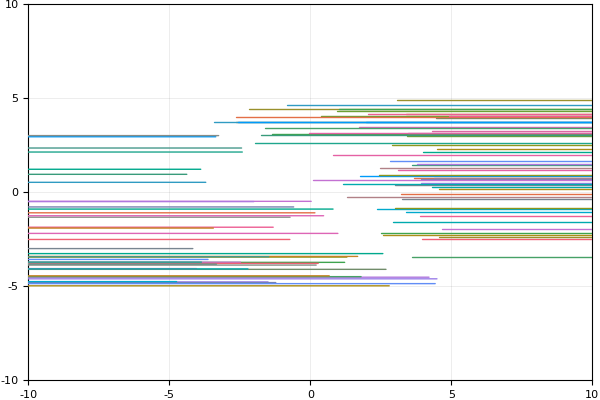

In [712]:
plot(X,Y,label="",xlims=(-10,10),ylims=(-10,10))

__ 2)__

In [713]:
f(x,t)=[-x[1]-x[2],0]

f (generic function with 1 method)


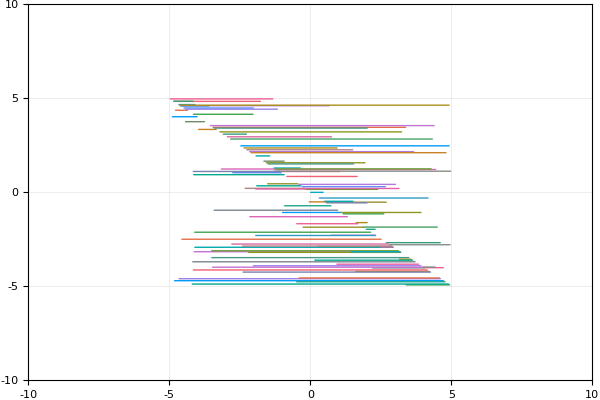

In [714]:
T=[]
X=[]
Y=[]
for i in 1:100  
ci=rand(2,1)*(10) -5
τ=RungeKutta4th(f,ci,-20,20,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-20,20,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-20,20,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end
plot(X,Y,label="",xlims=(-10,10),ylims=(-10,10))

__ 3)__


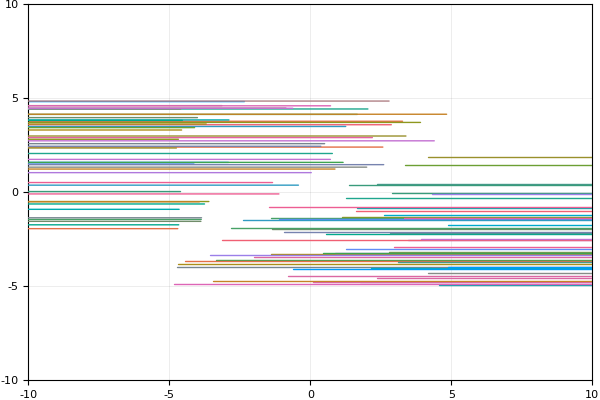

In [716]:
f(x,t)=[x[1]-2x[2],0]
#--------------------------------#
T=[]
X=[]
Y=[]
for i in 1:100 
ci=rand(2,1)*(10) -5
τ=RungeKutta4th(f,ci,-20,20,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-20,20,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-20,20,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end
plot(X,Y,label="",xlims=(-10,10),ylims=(-10,10))

__ 4)__


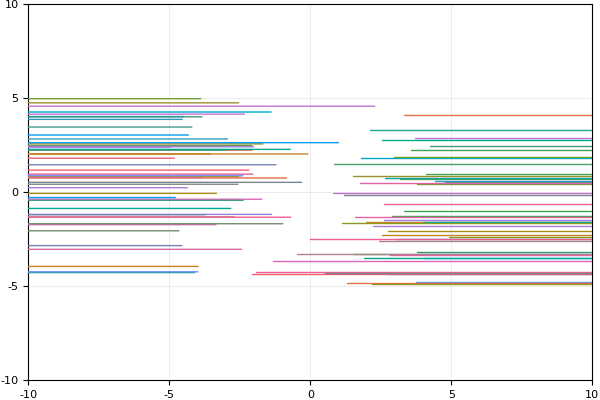

In [717]:
f(x,t)=[x[1]-0.5x[2],0]
#--------------------------------#
T=[]
X=[]
Y=[]
for i in 1:100  
ci=rand(2,1)*(10) -5
τ=RungeKutta4th(f,ci,-20,20,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-20,20,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-20,20,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end
plot(X,Y,label="",xlims=(-10,10),ylims=(-10,10))

__ 5)__


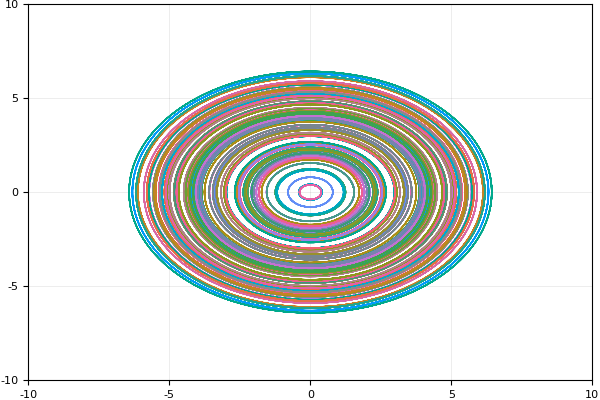

In [738]:
f(x,t)=[x[2],-x[1]]
#--------------------------------#
T=[]
X=[]
Y=[]
for i in 1:100  
ci=rand(2,1)*(10) -5
τ=RungeKutta4th(f,ci,-20,20,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-20,20,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-20,20,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end
plot(X,Y,label="",xlims=(-10,10),ylims=(-10,10))

__ 6)__


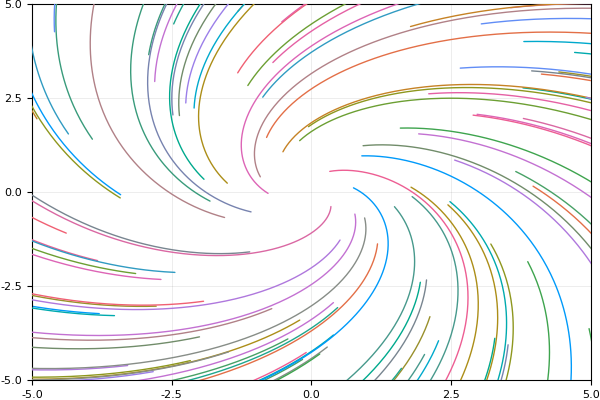

In [748]:
f(x,t)=[x[1]+x[2],-x[1]+x[2]]
#--------------------------------#
T=[]
X=[]
Y=[]
for i in 1:100 
ci=rand(2,1)*(10) -5
τ=RungeKutta4th(f,ci,-50,50,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-50,50,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-50,50,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end
plot(X,Y,label="",xlims=(-5,5),ylims=(-5,5))

__ 7)__


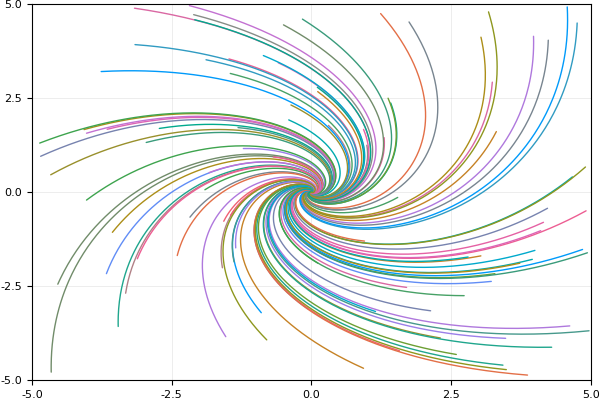

In [740]:
f(x,t)=[-x[1]+x[2],-x[1]-x[2]]
#--------------------------------#
T=[]
X=[]
Y=[]
for i in 1:100 
ci=rand(2,1)*(10) -5
τ=RungeKutta4th(f,ci,-20,20,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-20,20,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-20,20,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end
plot(X,Y,label="",xlims=(-5,5),ylims=(-5,5))

__ 8) __


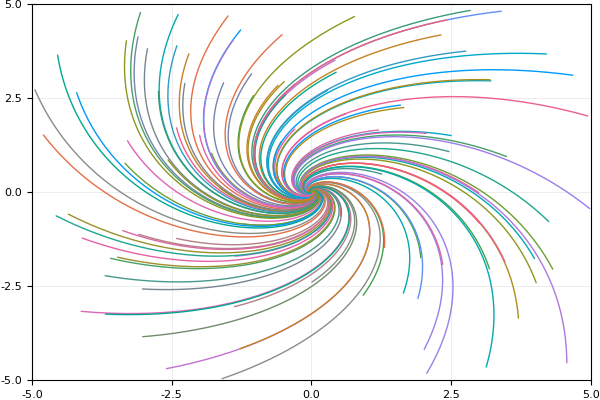

In [741]:
f(x,t)=[-x[1]-x[2],x[1]-x[2]]
#--------------------------------#
T=[]
X=[]
Y=[]
for i in 1:100 
ci=rand(2,1)*(10) -5
τ=RungeKutta4th(f,ci,-20,20,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-20,20,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-20,20,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end
plot(X,Y,label="",xlims=(-5,5),ylims=(-5,5))

__ 9)__


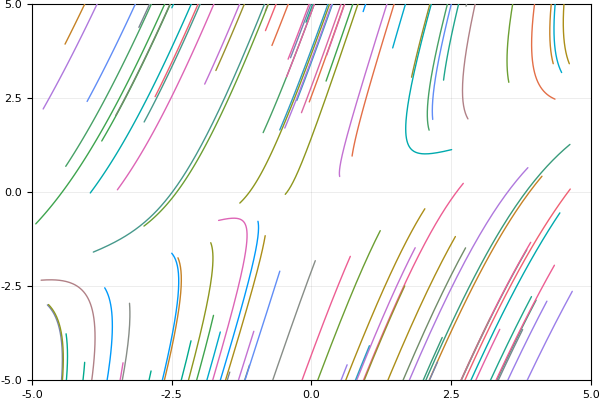

In [746]:
f(x,t)=[-x[1]+x[2],-2x[1]+4x[2]]
#--------------------------------#
T=[]
X=[]
Y=[]
for i in 1:100 
ci=rand(2,1)*(10) -5
τ=RungeKutta4th(f,ci,-50,50,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-50,50,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-50,50,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end
plot(X,Y,label="",xlims=(-5,5),ylims=(-5,5))


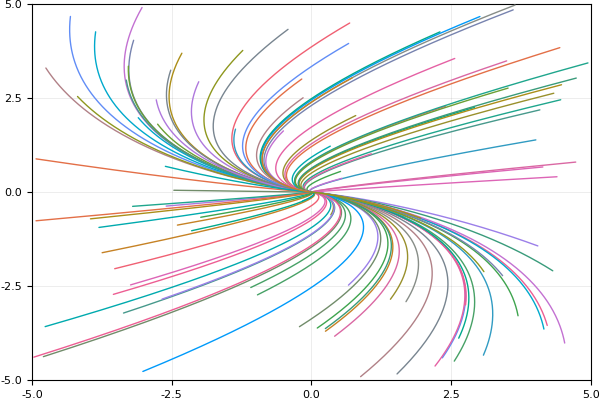

In [747]:
f(x,t)=[-x[1]-x[2],-x[2]]
#--------------------------------#
T=[]
X=[]
Y=[]
for i in 1:100 
ci=rand(2,1)*(10) -5
τ=RungeKutta4th(f,ci,-50,50,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-50,50,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-50,50,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end
plot(X,Y,label="",xlims=(-5,5),ylims=(-5,5))